## Data fitting
Generate "fake" data, then use a scipy library to fit a model to that data

More practice with plotting, numpy arrays

In [2]:
# We'll need a new library - scipy
import numpy as np
import matplotlib.pyplot as plt

# Just using this method, so just import this one thing
from scipy.stats import linregress

# Function to create the data

In [3]:
# Generate fake data - I've written this function to generate data of the form y = m x + b - and add noise
#  to the output (y). This is meant to model some real-world process where you're sampling data.

def make_up_linear_data(m=0.5, b=0.25, x_range=(0, 1), n_samples=100, noise_sd = 0.2):
    """ Generate y = mx + b data, over the given x range, and with the added (Gaussian) noise
    @param m - slope of regression function
    @param b - intercept of regression function
    @param x_range - use x values in this range (input is a tuple)
    @param n_samples - number of samples to generate
    @param noise_sd - standard deviation of Gaussian noise (no mean-shift
    @returns two arrays, x and y, each of length n_samples"""

    # Use uniform here because we want a relatively even distribution of samples in the x direction
    x_vals = np.random.uniform(x_range[0], x_range[1], n_samples)
    # Generate y values from x using the equation
    y_vals = m * x_vals + b

    # Add noise
    y_vals += np.random.normal(loc=0.0, scale=noise_sd, size=n_samples)

    # This returns a tuple with two numpy arrays in it - you can put in the parenthesis, but you don't need to
    return x_vals, y_vals


# Plot the data

To check: Does the black line cross the x=0 line at 0.2? Is the rise over the run 0.75? 
To play around with: Try changing the amount of noise, and see how that changes the scatter plot

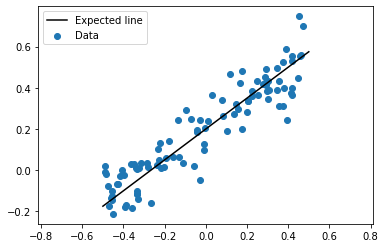

In [12]:
# First step, always: Plot your data
# I'm declaring variables here because we want to use the values later
my_slope = 0.75
my_intercept = 0.2
my_x_range = (-0.5, 0.5)
x, y = make_up_linear_data(m=my_slope, b=my_intercept, x_range=my_x_range, noise_sd=0.1)

# Plot the line the data came from (since we know what it is)
#  Note the cast from a tuple (my_x_range) to a numpy array so that m * x + b happens for all elements of my_x_range
plt.plot(my_x_range, my_slope * np.array(my_x_range) + my_intercept, '-k', label="Expected line")

# Use a scatter plot because the data isn't in any order
plt.scatter(x, y, label="Data")

# This is always a good idea if your axes have geometric meaning - i.e., if you're plotting a circle, this
#   will make sure the circle is, well, a circle and not an oval
# In this case, this let's us check that the slope of the data is correct by eye-balling the data
plt.axis('equal')

plt.legend()

# Fit the data

Now do the actual "fit" to the noisy data and plot the results
See https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

This function returns a LOT of parameters. Older versions of scipy will return a tuple, and you have to "know"
the order of the return values; newer versions return an object with named variables

Print out how good the fit was - you should always check that r and p are "reasonable", and that stderr is not too big, relative to your data.

This is a light-hearted take on linear regression and r, p values: https://thestatsninja.com/2018/11/07/the-analytics-pain-part-3-interpreting-p-values-with-linear-regression/

In [15]:
# Old-school tuple, with unpacking
ret_slope, ret_intercept, ret_rvalue, ret_pvalue, ret_se = linregress(x, y)
print(f"Original slope: {my_slope} and intercept {my_intercept}")
print(f"Returned slope: {ret_slope}, intercept {ret_intercept}, stderr {ret_se}")

Original slope: 0.75 and intercept 0.2
Returned slope: 0.6867065372632883, intercept 0.20385024427782222, stderr 0.028594966910753684


In [16]:
# New version, with spiffy names
ret_results = linregress(x, y)
print(f"Original slope: {my_slope} and intercept {my_intercept}")
print(f"Returned slope: {ret_results.slope}, intercept {ret_results.intercept}, stderr {ret_results.stderr}")

Original slope: 0.75 and intercept 0.2
Returned slope: 0.6867065372632883, intercept 0.20385024427782222, stderr 0.028594966910753684


# Plot the fitted line

Try changing the noise added and re-run the fit and plot - how does the standard error vary as you vary the noise? If you eye-ball the plot, is the standard error about what you would expect based on the average distance of the points from the fitted line?

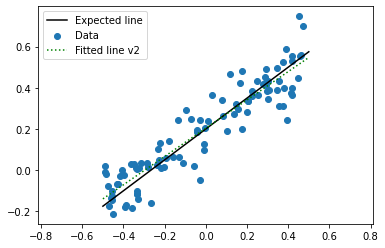

In [17]:
# Plot the line the data came from (since we know what it is)
plt.plot(my_x_range, my_slope * np.array(my_x_range) + my_intercept, '-k', label="Expected line")

# Use a scatter plot because the data isn't in any order
plt.scatter(x, y, label="Data")

# Plot the fitted line (using new spiffy names)
plt.plot(my_x_range, ret_results.slope * np.array(my_x_range) + ret_results.intercept, ':g', label="Fitted line")

plt.axis('equal')

plt.legend()